### This notebook shows a simple AutoML flow for Time Series using the new PyCaret Time Series Module (Alpha Release).

## Install Alpha Release of Time Series Module

In [1]:
## after 06/27/2021
# !pip install pycaret-ts-alpha

## Import libraries

In [2]:
from pprint import pprint
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

from sktime.utils.plotting import plot_series

## Load data

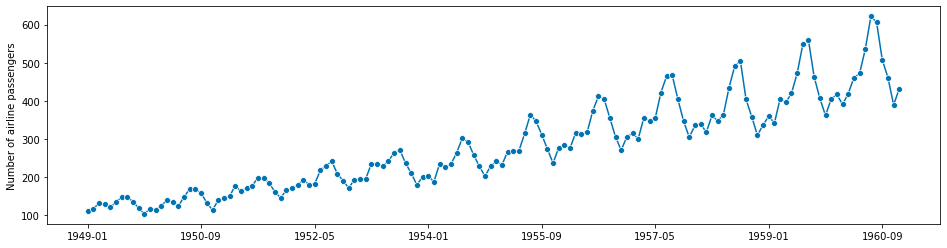

In [3]:
y = get_data('airline', verbose=False)
_ = plot_series(y)

## Setup PyCaret Time Series Experiment 

* Based on business needs and good data science principles
  - e.g. Interested in forecasting 12 months out
  - Use 3 folds to do any cross-validation
  
* **Important arguments to setup**
  - `fh` - forecast-horizon
  - `folds` - number of cross validation folds to use
  - `fold_strategy` - 'sliding' or 'expanding'
  - `seasonal_period`: Inferred using index; can be explicitly set

In [4]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=12, fold=3, session_id=42)

,Description,Value
0,session_id,42
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


## Available Models

In [5]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True
tbats,TBATS,sktime.forecasting.tbats.TBATS,False


## Manual Model Selection

### Creating a Model

In [6]:
## Create a model manually
model = exp.create_model("naive")
model

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,63.4167,6967.9167,0.1549,0.1766,-1.2681
1,1957-12,52.3333,5842.1667,0.1205,0.1351,-0.5305
2,1958-12,91.3333,12811.6667,0.1954,0.2259,-1.8662
Mean,nan,69.0278,8540.5833,0.1569,0.1792,-1.2216
SD,nan,16.4086,3054.8806,0.0306,0.0371,0.5463


NaiveForecaster(sp=1, strategy='last', window_length=None)

In [7]:
y_train = exp.get_config("y_train")

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Naive Forecaster,76.0000,102.9765,0.1425,0.1612,-0.9143


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

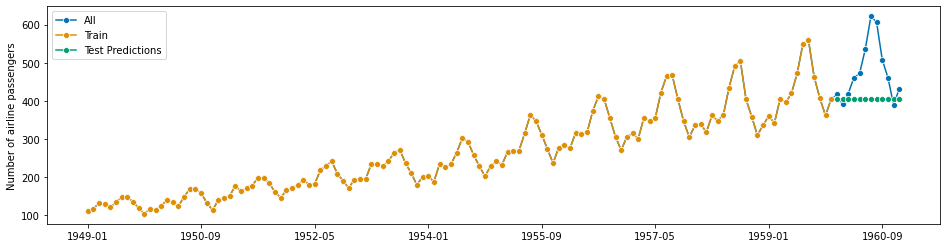

In [8]:
y_predict = exp.predict_model(model)
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test Predictions'])

### Tune Model Hyperparameters

In [9]:
tuned_model = exp.tune_model(model)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,54.5675,5389.9425,0.1332,0.1489,-0.7545
1,1957-12,47.2819,4743.9295,0.1108,0.1205,-0.2428
2,1958-12,79.0434,10522.4321,0.1667,0.1909,-1.3541
Mean,nan,60.2976,6885.4347,0.1369,0.1534,-0.7838
SD,nan,13.5849,2585.2332,0.0230,0.0289,0.4542


In [10]:
print(model)
print(tuned_model)

NaiveForecaster(sp=1, strategy='last', window_length=None)
NaiveForecaster(sp=1, strategy='drift', window_length=None)


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Naive Forecaster,66.3079,92.6664,0.1242,0.1381,-0.5502


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

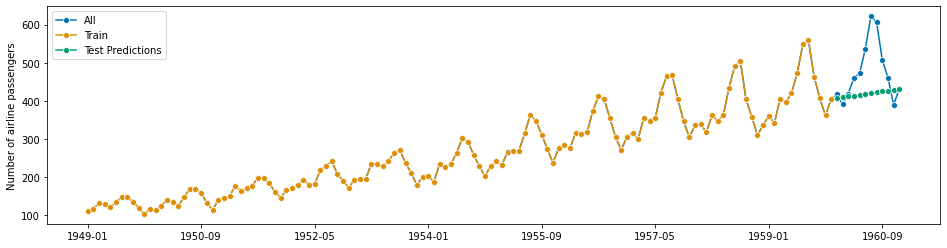

In [11]:
y_predict = exp.predict_model(tuned_model)
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test Predictions'])

### How do you pick the best model from the model zoo?

**That is where `compare_models` comes in**

### Get the best baseline models from the model zoo

In [12]:
best_baseline_models = exp.compare_models(n_select=3, sort='mae')

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,19.5889,529.3478,0.0498,0.0498,0.8624,0.1100
exp_smooth,Exponential Smoothing,19.7275,532.6698,0.0503,0.0502,0.8608,0.1100
arima,ARIMA,20.0069,528.2344,0.0501,0.0507,0.8677,0.2233
auto_arima,Auto ARIMA,21.0297,602.4566,0.0525,0.0531,0.8509,2.8967
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,24.4233,1017.0008,0.0584,0.0601,0.7169,0.5300
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,24.8102,1079.7144,0.0613,0.0631,0.6888,0.2067
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,25.8293,1290.4445,0.0617,0.0641,0.6260,0.4733
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,26.0039,1159.3274,0.0617,0.0639,0.6725,1.4167
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,26.8586,1450.7603,0.0629,0.0654,0.6023,0.5633
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,27.8200,1437.6933,0.0661,0.0686,0.6015,0.0800


In [13]:
best_baseline_models

[AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
         error='add', freq=None, full_output=True, information_criterion='aic',
         initial_level=None, initial_seasonal=None, initial_trend=None,
         initialization_method='estimated', maxiter=1000, missing='none',
         n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
         start_params=None, trend='add'),
 ExponentialSmoothing(damped_trend=False, initial_level=None,
                      initial_seasonal=None, initial_trend=None,
                      initialization_method='estimated', seasonal='add', sp=12,
                      trend='add', use_boxcox=None),
 ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 12),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True

### Tune the best baseline models

In [14]:
best_tuned_models = [exp.tune_model(model) for model in best_baseline_models]
best_tuned_models

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,13.2626,277.8525,0.0331,0.0339,0.9096
1,1957-12,19.1686,455.3259,0.0530,0.0513,0.8807
2,1958-12,21.1925,551.0621,0.0491,0.0506,0.8767
Mean,nan,17.8746,428.0802,0.0451,0.0453,0.8890
SD,nan,3.3642,113.1890,0.0086,0.0080,0.0146


[AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
         error='add', freq=None, full_output=True, information_criterion='aic',
         initial_level=None, initial_seasonal=None, initial_trend=None,
         initialization_method='estimated', maxiter=1000, missing='none',
         n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
         start_params=None, trend='add'),
 ExponentialSmoothing(damped_trend=False, initial_level=None,
                      initial_seasonal=None, initial_trend=None,
                      initialization_method='estimated', seasonal='add', sp=12,
                      trend='add', use_boxcox=False),
 ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(1, 1, 0, 12),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=Tru

### Blend Models

In [15]:
mean_blender = exp.blend_models(best_tuned_models, method='mean')

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,13.1354,296.4678,0.0328,0.0336,0.9035
1,1957-12,22.4964,596.8594,0.0623,0.0601,0.8436
2,1958-12,20.5070,558.8614,0.0470,0.0485,0.8750
Mean,nan,18.7129,484.0628,0.0474,0.0474,0.8740
SD,nan,4.0266,133.5537,0.0121,0.0108,0.0244


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,15.5018,18.7176,0.0316,0.0319,0.9368


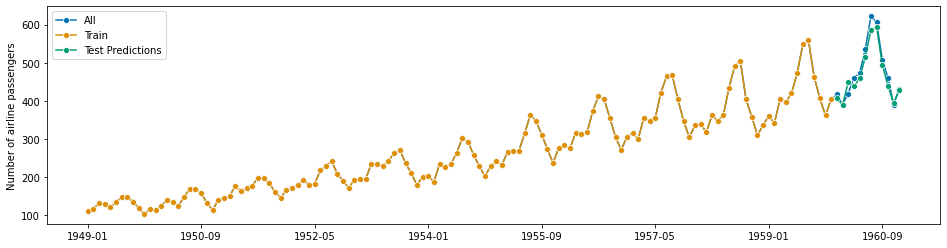

In [16]:
y_pred = exp.predict_model(mean_blender)
_ = plot_series(y, y_train, y_pred[0], labels=['All', 'Train', 'Test Predictions'])

### Finalize Model

**Trains the tuned model on the full dataset so we are ready to forecast the future after that.**

In [17]:
final_model = exp.finalize_model(mean_blender)

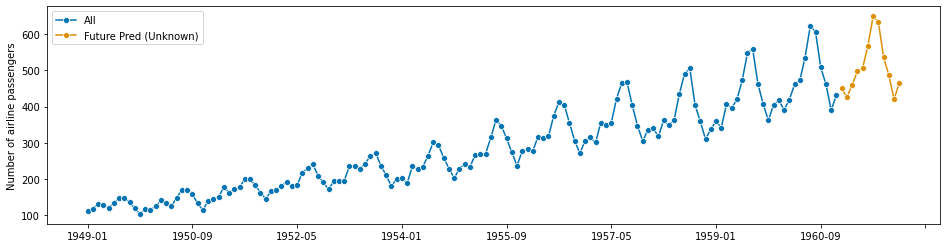

In [18]:
y_pred_future = exp.predict_model(final_model, verbose=False)
_ = plot_series(y, y_pred_future[0], labels=['All', 'Future Pred (Unknown)'])

### Save Model

In [19]:
_ = exp.save_model(final_model, 'best_model', model_only=True)

Transformation Pipeline and Model Succesfully Saved


### Load Model

In [20]:
loaded_model = exp.load_model('best_model')

Transformation Pipeline and Model Successfully Loaded


### Predict using loaded model

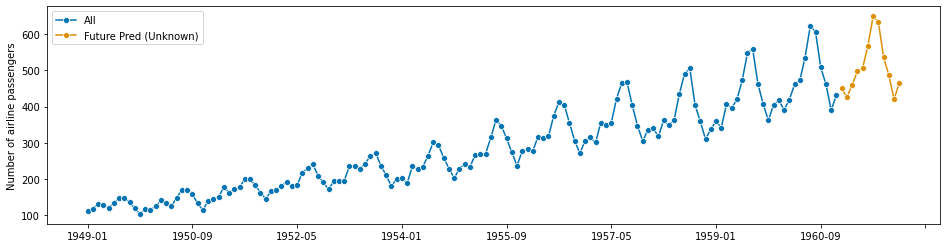

In [21]:
y_pred_future = exp.predict_model(loaded_model, verbose=False)
_ = plot_series(y, y_pred_future[0], labels=['All', 'Future Pred (Unknown)'])

## Complete Workflow Examples 

### Airline Data

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,13.1354,296.4678,0.0328,0.0336,0.9035
1,1957-12,22.4964,596.8594,0.0623,0.0601,0.8436
2,1958-12,20.5070,558.8614,0.0470,0.0485,0.8750
Mean,nan,18.7129,484.0628,0.0474,0.0474,0.8740
SD,nan,4.0266,133.5537,0.0121,0.0108,0.0244


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,15.5018,18.7176,0.0316,0.0319,0.9368


Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded


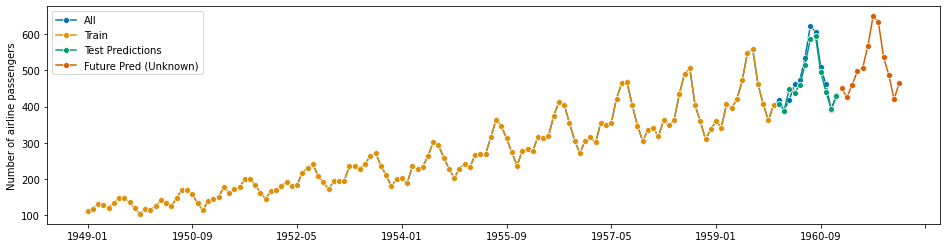

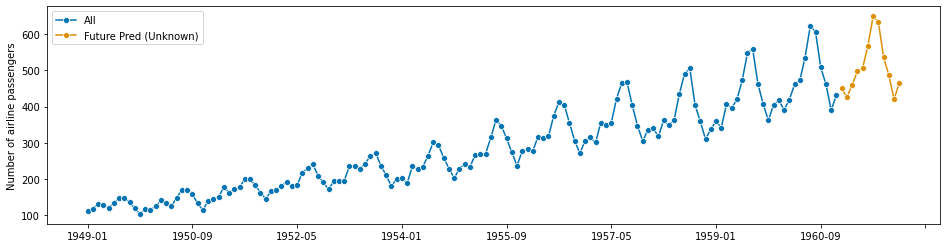

In [22]:
# Import libraries
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series

# Get Data
y = get_data('airline')

# Setup Experiment (forecast horizon, cross-validation folds, etc.)
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=12, fold=3, session_id=42)

# Build multiple models >> then select, tune and blend the best models
best_baseline_models = exp.compare_models(n_select=3)
best_tuned_models = [exp.tune_model(model) for model in best_baseline_models]
mean_blender = exp.blend_models(best_tuned_models, method='mean')

# Test Set Predictions
y_pred = exp.predict_model(mean_blender)

# Finalize Model
final_model = exp.finalize_model(mean_blender)

# Future Predictions
y_pred_future = exp.predict_model(final_model, verbose=False)

# Plot Results
y_train = exp.get_config("y_train")
_ = plot_series(y, y_train, y_pred[0], y_pred_future[0], labels=['All', 'Train', 'Test Predictions', 'Future Pred (Unknown)'])

# Save Model
_ = exp.save_model(final_model, 'best_model', model_only=True)

# Load Model 
loaded_model = exp.load_model('best_model')

# Predict using the loaded model
y_pred_future = exp.predict_model(loaded_model, verbose=False)
_ = plot_series(y, y_pred_future[0], labels=['All', 'Future Pred (Unknown)'])

### Lynx Data

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,1898,1724.9755,5644755.2007,0.5221,0.7406,0.0133
1,1907,577.7677,434504.1251,0.6311,0.3841,0.7568
2,1916,1366.4819,2243874.4311,6.3470,1.1808,-0.6509
Mean,nan,1223.0750,2774377.9189,2.5001,0.7685,0.0397
SD,nan,479.1976,2159900.3882,2.7206,0.3258,0.5750


,Model,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,230.0590,263.8337,0.2267,0.1928,0.9357


Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded


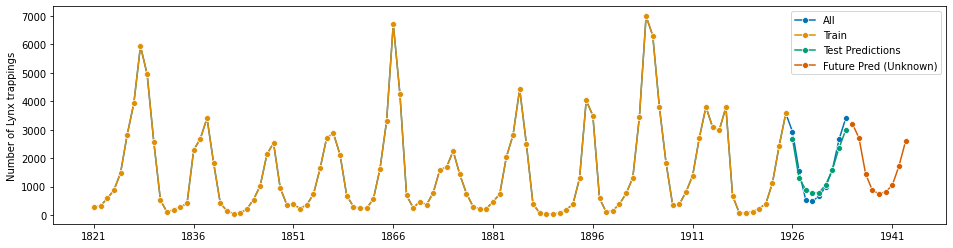

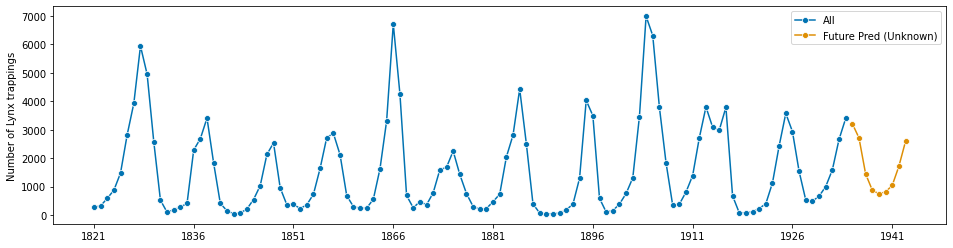

In [23]:
# Import libraries
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series

# Get Data
y = get_data('lynx')

# Setup Experiment (forecast horizon, cross-validation folds, etc.)
# We specify seasoanal_periods for yearly data
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=9, fold=3, session_id=42, seasonal_period=9)

# Build multiple models >> then select, tune and blend the best models
best_baseline_models = exp.compare_models(n_select=3)
best_tuned_models = [exp.tune_model(model) for model in best_baseline_models]
mean_blender = exp.blend_models(best_tuned_models, method='mean')

# Test Set Predictions
y_pred = exp.predict_model(mean_blender)

# Finalize Model
final_model = exp.finalize_model(mean_blender)

# Future Predictions
y_pred_future = exp.predict_model(final_model, verbose=False)

# Plot Results
y_train = exp.get_config("y_train")
plot_series(y, y_train, y_pred[0], y_pred_future[0], labels=['All', 'Train', 'Test Predictions', 'Future Pred (Unknown)'])

# Save Model
_ = exp.save_model(final_model, 'best_model', model_only=True)

# Load Model
loaded_model = exp.load_model('best_model')

# Predict using the loaded model
y_pred_future = exp.predict_model(loaded_model, verbose=False)
_ = plot_series(y, y_pred_future[0], labels=['All', 'Future Pred (Unknown)'])

## Summary

* We can train, tune and optimize a complete time series forecasting model in just a few lines of code using pycaret.
* pycaret does the heavy lifting - ideal for novice data scientists
* However, it is not a black box. It provides a lot of customizations and the ability to look under the hood (check out 202 notebook).

### 202 Notebook Overview

#### Setup
* Look under the hood of how `pycaret` is splitting the data into train/test split.
* Explore the cross-validation splitter used internally by `pycaret`

#### Model Training and Tuning
* Customize the arguments used to create a model using `create_model()`
* Inspect the results of all hyperparameter combinations in `tune_model()`
* Customize the grid used to perform hyperparameter search using `tune_model()`

#### Model Prediction
* Getting prediction intervals